In [35]:
import numpy as np
import matplotlib.pylab as plt
np.random.seed(1)

In [36]:
%matplotlib inline

Lets begin by generating random data with 3 dimensions with 40 samples . We will have two class with 20 samples per class.

In [5]:
vec1 = np.array([0, 0, 0])
mat1 = np.eye(3)
sample_for_class1 = np.random.multivariate_normal(vec1, mat1, 20).T

assert sample_for_class1.shape == (3, 20), "The dimension of the sample_for_class1 matrix is not 3x20"

vec2 = np.array([1, 1, 1])
mat2 = np.eye(3)
sample_for_class2 = np.random.multivariate_normal(vec2, mat2, 20).T

assert sample_for_class2.shape == (3, 20), "The dimension of the sample_for_class2 matrix is not 3x20"

all_data = np.concatenate((sample_for_class1, sample_for_class2), axis=1)

assert all_data.shape == (3, 40), "The dimension of the all_data matrix is not 3x20"

In [14]:
mean_dim1 = np.mean(all_data[0, :])
mean_dim2 = np.mean(all_data[1, :])
mean_dim3 = np.mean(all_data[2, :])

mean_vector = np.array([[mean_dim1], [mean_dim2], [mean_dim3]])

print(mean_vector.reshape(-1), '\n', mean_vector)

[0.41667492 0.69848315 0.49242335] 
 [[0.41667492]
 [0.69848315]
 [0.49242335]]


In [17]:
all_data[:, 0].reshape(3, 1)

array([[ 1.62434536],
       [-0.61175641],
       [-0.52817175]])

In [21]:
scatter_matrix = np.zeros((3,3))
for i in range(all_data.shape[1]):
    scatter_matrix += (all_data[:, i].reshape(3, 1) - mean_vector).dot(
        (all_data[:, i].reshape(3, 1) - mean_vector).T)
print('The Scatter Matrix is :\n', scatter_matrix)

The Scatter Matrix is :
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]


## Eigenvalues and Eigenvectors

$$
Ax = \lambda x
$$

Where A denotes the matrix , x denotes the eigenvector and $\lambda$ denotes the eigenvalues.


A Eigenvector of a matrix (which can be seen as a linear transformation of matrix) is the condensed vector which summarizes one axes of the matrix.

A matrix can have more than one eigenvector , and at max d eigenvectors if matrix is of dimention d X d.

n x n matrix could have n eigenvectors, each one representing its line of action in one dimension


The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [23]:
eig_val, eig_vec = np.linalg.eig(scatter_matrix)
eig_val, eig_vec

(array([65.16936779, 32.69471296, 26.59620328]),
 array([[-0.49210223, -0.64670286,  0.58276136],
        [-0.47927902, -0.35756937, -0.8015209 ],
        [-0.72672348,  0.67373552,  0.13399043]]))

In [26]:
for ev in eig_vec:
    print(ev)
    print(ev[0]**2 + ev[1]**2 + ev[2]**2)
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[-0.49210223 -0.64670286  0.58276136]
1.0000000000000013
[-0.47927902 -0.35756937 -0.8015209 ]
0.9999999999999992
[-0.72672348  0.67373552  0.13399043]
0.9999999999999997


In [28]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
print(eig_pairs)

# We then Sort list of tuples by the eigenvalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# verify that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)

[(65.16936779078195, array([-0.49210223, -0.47927902, -0.72672348])), (32.69471296321799, array([-0.64670286, -0.35756937,  0.67373552])), (26.596203282097097, array([ 0.58276136, -0.8015209 ,  0.13399043]))]
(65.16936779078195, array([-0.49210223, -0.47927902, -0.72672348]))
(32.69471296321799, array([-0.64670286, -0.35756937,  0.67373552]))
(26.596203282097097, array([ 0.58276136, -0.8015209 ,  0.13399043]))


In [29]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [32]:
transformed = matrix_w.T.dot(all_data)
transformed 

array([[-0.12230714,  1.78582073, -0.72564846,  0.91911067, -0.48120545,
         1.26186049,  0.49974121, -1.36060904, -0.02630959,  0.20346559,
         1.02990798,  0.74684543, -0.76873682,  0.37184198, -0.48040292,
        -1.30433953, -0.57308381,  0.9748035 , -0.78806782, -1.23832629,
        -2.30009539, -1.73062935, -4.57170736,  0.04785487, -2.42616804,
        -1.15792646, -2.01497976, -1.98672036, -1.36534078, -2.76311357,
        -2.1041081 , -1.64296088, -1.09921946, -2.71718701, -1.38545546,
        -1.44331476, -0.58485289, -1.63411201, -1.21353834, -1.73760916],
       [-1.18757151, -1.16617976, -0.64124251, -1.74952646,  1.10969495,
         0.18151348, -0.97722286, -0.72412904, -0.42090149,  1.05827266,
         0.12619324,  0.77808138,  1.75701561, -1.00931473, -0.08774954,
         1.75869787, -0.09616466,  0.4009659 ,  0.49058694, -0.10791262,
         0.05492635, -0.3633537 , -0.13330484,  0.74907576, -0.53466984,
         1.6445517 , -0.90160187,  0.00885182, -0.

In [33]:
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

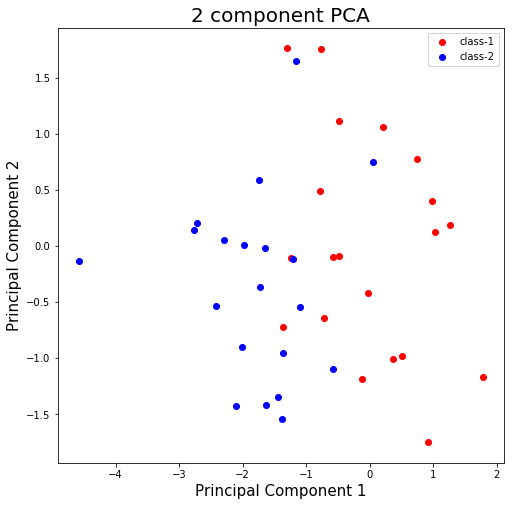

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['class-1', 'class-2']
colors = ['r', 'b']
ax.scatter(transformed[0, 0:20], transformed[1, 0:20], c=colors[0], label=targets[0])
ax.scatter(transformed[0, 20:], transformed[1, 20:], c=colors[1], label=targets[1])
ax.legend(targets)

# References

[CSDN-1](https://blog.csdn.net/weixin_38314865/article/details/84190175)

[Plt](https://plotly.com/python/v3/ipython-notebooks/principal-component-analysis/)

[PCA](https://medium.com/@raghavan99o/principal-component-analysis-pca-explained-and-implemented-eeab7cb73b72)

[eigenvector](https://pathmind.com/wiki/eigenvector)

![2D to 1D](https://raw.githubusercontent.com/qrsforever/assets_blog_post/master/Note/Math/pca-1.png)